## HeatMap 

#### Steve Pittard wsp@emory.edu

**Requirements:**

Execute this notebook in a conda environment that has matplolib and numpy installed. 


This notebook explores the various options for constructing a heatmap. The data was generated by the R code Alasdair provided. Check [here](https://raw.githubusercontent.com/Ortlund-Laboratory/Deep_Mutational_Scanning/main/data/mut_range.csv) for a copy of the data. 

We'll read this in and do some basic modifications on it and then create a heatmap using the **seaborn** heatmap function. There are 3D options as well but this notebook targets the plotting of a usable heatmap sutiable for publication. Check the [Seaborn Heatmap web page](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

### Importing Data

This is Python so there always lots of things to import. We'll use pandas to read in the data. 

In [12]:
# RUN THIS CELL !
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns


In [13]:
url = "https://raw.githubusercontent.com/Ortlund-Laboratory/Deep_Mutational_Scanning/main/data/mut_range.csv"
df = pd.read_csv(url)

print(df.head(10))

   site mutation     logKa
0   216        A  6.490149
1   216        C  6.517461
2   216        D  6.496699
3   216        F  6.450518
4   216        G  6.436970
5   216        H  6.509969
6   216        I  6.502045
7   216        K  6.505562
8   216        L  6.623618
9   216        M  6.516179


Text(283.22222222222223, 0.5, 'Mutation')

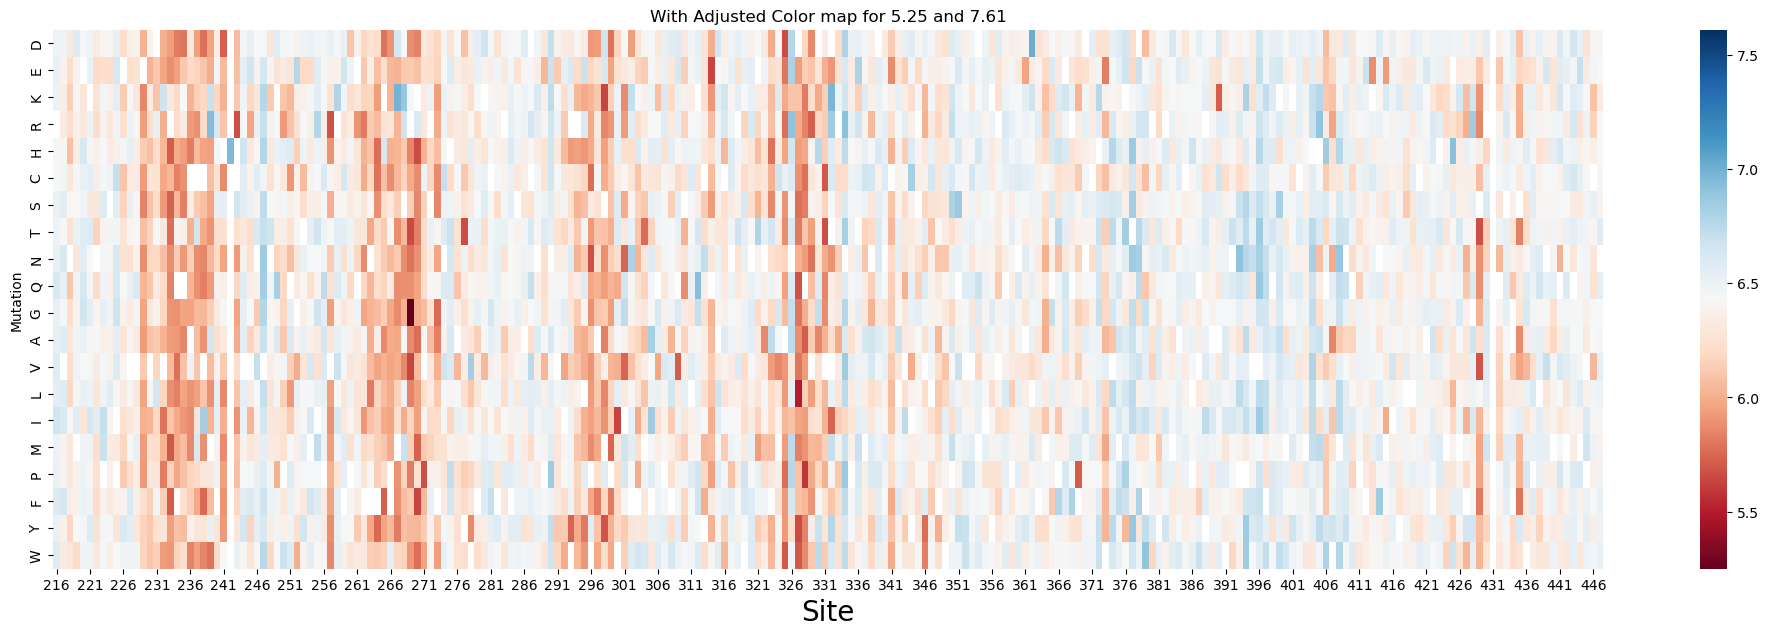

In [19]:
# So we reorganize the data for use with the heatmap
# This creates a matrix structure

pivot_df = df.pivot(index="mutation",columns="site",values="logKa")

# We need to reorder the mutations
mutations = ['D', 'E', 'K', 'R', 'H', 'C', 'S', 'T', 'N', 'Q', 'G', 'A', 'V', 'L', 'I', 'M', 'P', 'F', 'Y', 'W']

# The size can be experimented with
fig = plt.figure(figsize=(25, 7))

# xticklabels are 5 apart but this can be adjusted
sns.heatmap(pivot_df,
            xticklabels=5,
            yticklabels=mutations,
            cmap='RdBu',
            vmin=5.25,
            vmax=7.61)

# The following are annotation commands

#plt.xticks(rotation=90)
plt.title("With Adjusted Color map for 5.25 and 7.61")
plt.xlabel("Site")       # Can also use the fontsize=10 argument
plt.ylabel("Mutation")

## Various Arguments

So there are arguments that one could experiment with the more common of which will be the figure size. Keep in mind that changing the size might adjust the axis labels. There are arguments to adjust the font size of the labels as well as their orientation but the first thing to do is to get a size that is desireable.

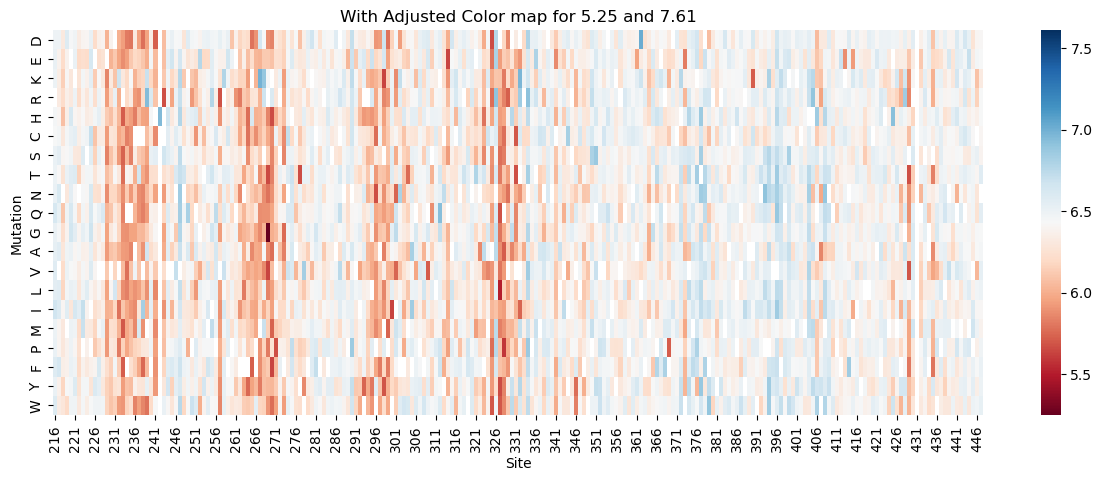

We are in: /Users/tico/Documents/2024_BIOS_534/bios_534


In [62]:
# The size can be experimented with
fig = plt.figure(figsize=(15, 5))

# xticklabels are 5 apart but this can be adjusted
sns.heatmap(pivot_df,xticklabels=5,
            yticklabels=mutations,
            cmap='RdBu',
            vmin=5.25,
            vmax=7.61)
#plt.xticks(rotation=90)
plt.title("With Adjusted Color map for 5.25 and 7.61")
plt.xlabel("Site")       # Can also use the fontsize=10 argument
plt.ylabel("Mutation")
# Save the plot to a file in the current folder
plt.savefig('output_plot.png', dpi=300)  # Save as .png with DPI set to 300 for high resolution
plt.show()

print("We are in:",os.getcwd())

## 3D Heatmap

So this section experiments wiht the construction of a 3D heatmap. 3D heatmaps can be difficult to make in a way that is scientifically useful for diagnostics purposes. A lot of it depends on the rotation and perspective of the resulting plot. 


Much of the code below is there to assign underlying numeric variables to the 

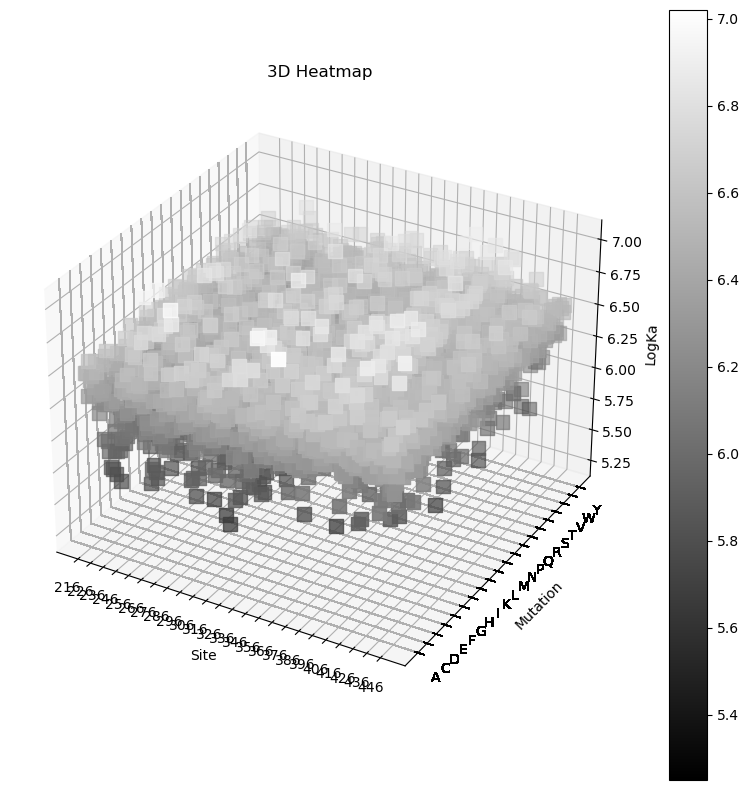

In [32]:
# Encode categorical variables (site and mutation)
label_encoder_site = LabelEncoder()
label_encoder_mutation = LabelEncoder()

df['site_encoded'] = label_encoder_site.fit_transform(df['site'])
df['mutation_encoded'] = label_encoder_mutation.fit_transform(df['mutation'])

# Create mappings for encoded values to original labels
site_mapping = dict(zip(df['site_encoded'], df['site']))
mutation_mapping = dict(zip(df['mutation_encoded'], df['mutation']))

# Creating 3D figures
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Creating the heatmap
img = ax.scatter(df['site_encoded'], 
                 df['mutation_encoded'], df['logKa'], marker='s', s=100, c=df['logKa'], cmap='gray')
plt.colorbar(img)

# Adding title and labels with original labels
ax.set_title("3D Heatmap")
ax.set_xlabel('Site')
ax.set_ylabel('Mutation')
ax.set_zlabel('LogKa')

# Set ticks and labels for x-axis (Site)
tick_interval = 10
ax.set_xticks(np.arange(df['site_encoded'].min(), df['site_encoded'].max() + 1, tick_interval))
ax.set_xticklabels([site_mapping[val] for val in np.arange(df['site_encoded'].min(), df['site_encoded'].max() + 1, tick_interval)])

# Set ticks and labels for y-axis (Mutation)
ax.set_yticks(df['mutation_encoded'])
ax.set_yticklabels([mutation_mapping[val] for val in df['mutation_encoded']])

# Displaying plot
plt.show()

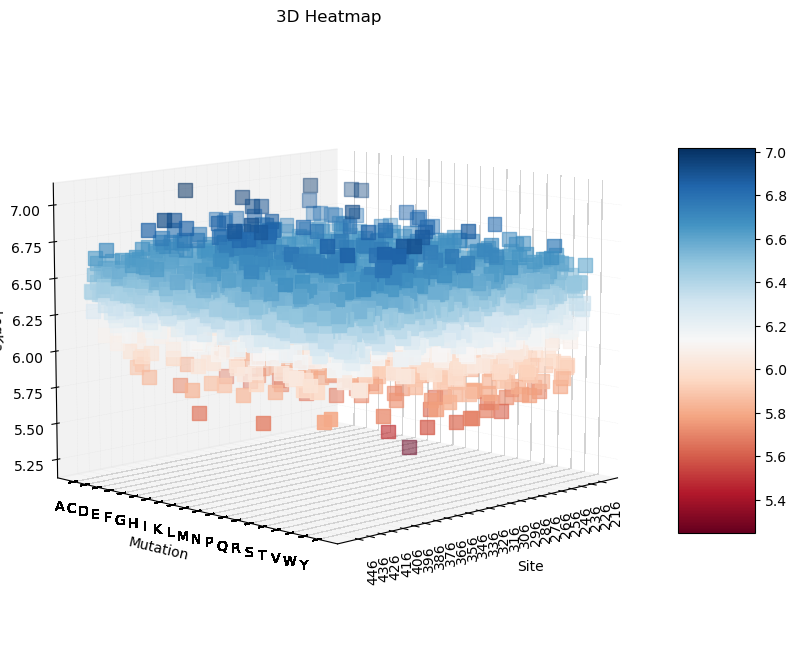

In [155]:
# Encode categorical variables (site and mutation)
label_encoder_site = LabelEncoder()
label_encoder_mutation = LabelEncoder()

df['site_encoded'] = label_encoder_site.fit_transform(df['site'])
df['mutation_encoded'] = label_encoder_mutation.fit_transform(df['mutation'])

# Create mappings for encoded values to original labels
site_mapping = dict(zip(df['site_encoded'], df['site']))
mutation_mapping = dict(zip(df['mutation_encoded'], df['mutation']))

# Creating 3D figures
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=10, azim=45)

# Creating the heatmap with the "viridis" colormap
img = ax.scatter(df['site_encoded'], 
                 df['mutation_encoded'], 
                 df['logKa'], 
                 marker='s', 
                 s=100, 
                 c=df['logKa'], 
                 cmap='RdBu')
plt.colorbar(img, shrink=0.5, aspect=5)

# Adding title and labels with original labels
ax.set_title("3D Heatmap")
ax.set_xlabel('Site',labelpad=15)  
ax.set_ylabel('Mutation')
ax.set_zlabel('LogKa')


ax.xaxis.set_tick_params(rotation=90, labelsize=10)  # Rotate tick labels by 45 degrees, set size to 10 points


# Set ticks and labels for x-axis (Site)
tick_interval = 10
ax.set_xticks(np.arange(df['site_encoded'].min(), 
                        df['site_encoded'].max() + 1,
                        
                        tick_interval))
ax.set_xticklabels([site_mapping[val] for val in np.arange(df['site_encoded'].min(), 
                                                           df['site_encoded'].max() + 1, tick_interval)])

# Set ticks and labels for y-axis (Mutation)
ax.set_yticks(df['mutation_encoded'])
ax.set_yticklabels([mutation_mapping[val] for val in df['mutation_encoded']])



# Customize grid lines for each axis
ax.xaxis._axinfo['grid'].update(color = 'lightgray', linestyle = ':', linewidth = 0.2)
ax.yaxis._axinfo['grid'].update(color = 'lightgray', linestyle = ':', linewidth = 0.2)
ax.zaxis._axinfo['grid'].update(color = 'lightgray', linestyle = ':', linewidth = 0.2)

ax.xaxis.pane.fill = False  # Disable default filling
ax.xaxis.pane.set_edgecolor('w')  # White edge color
ax.xaxis.pane.set_alpha(0.9)  # Set transparency (0 to 1, where 0 is fully transparent)


# Customize grid lines
#ax.grid(True, linestyle=':', 
#        linewidth=0.5, 
#        color='lightgray')

# Displaying plot
plt.show()

In [93]:
glue = df.pivot(index="mutation",columns="site",values="logKa")

Text(0.5, 1.0, 'With Adjusted Color map for 5.25 and 7.61')

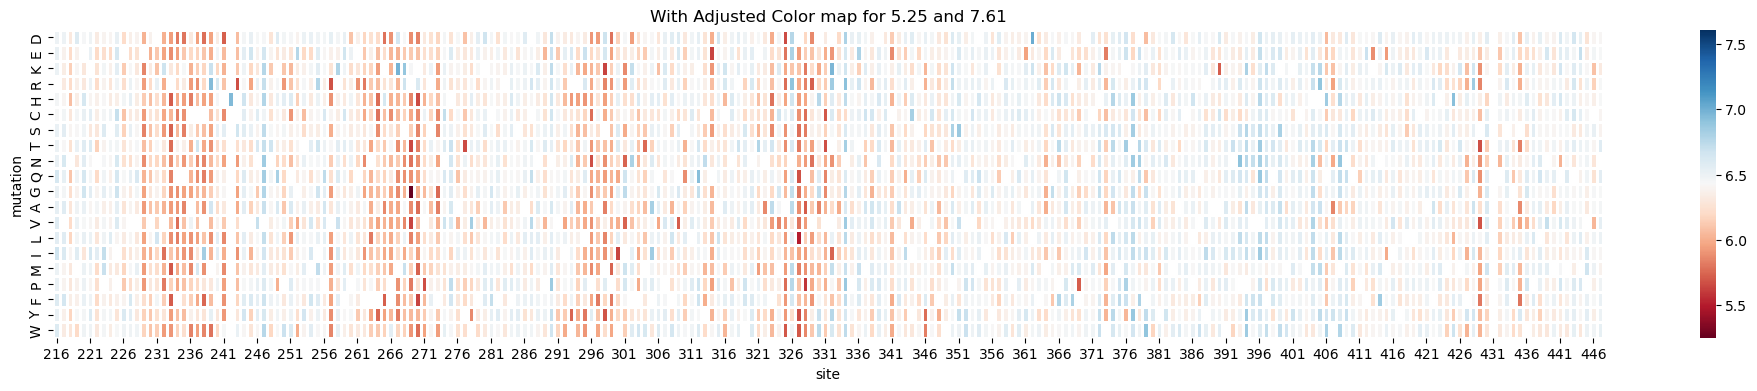

In [218]:
mutations = ['D', 'E', 'K', 'R', 'H', 'C', 'S', 'T', 'N', 'Q', 'G', 'A', 'V', 'L', 'I', 'M', 'P', 'F', 'Y', 'W']
fig = plt.figure(figsize=(25, 4))
sns.heatmap(glue,xticklabels=5,
            yticklabels=mutations,
            cmap='RdBu',
            vmin=5.25,vmax=7.61,linewidths=1)
#plt.xticks(rotation=90)
plt.title("With Adjusted Color map for 5.25 and 7.61")

Text(0.5, 1.0, 'No limit correction')

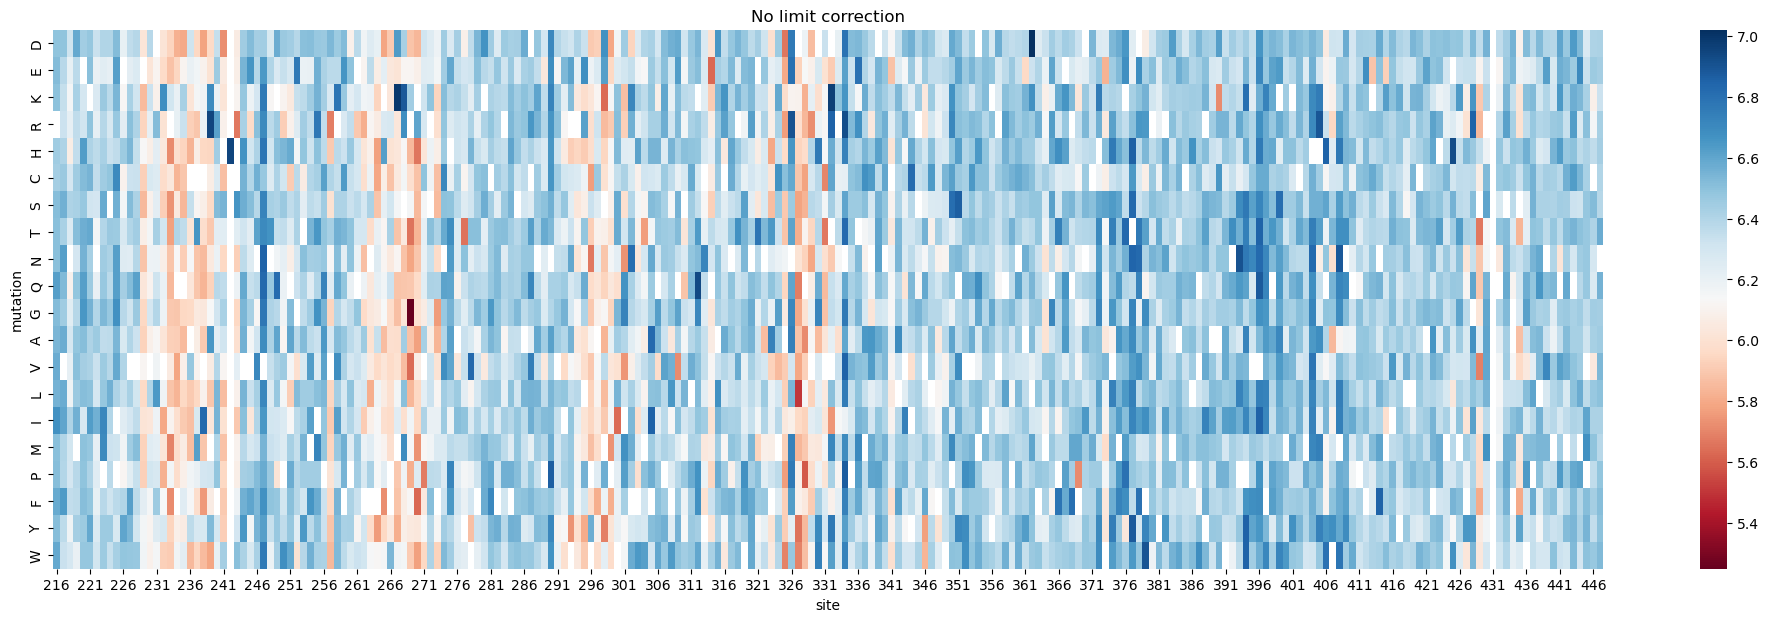

In [190]:
fig = plt.figure(figsize=(25, 7))
sns.heatmap(glue,xticklabels=5,yticklabels=mutations,cmap='RdBu')
plt.title("No limit correction")

In [165]:
heatmap = sns.heatmap(glue, xticklabels=10, yticklabels=mutations, cmap='RdBu')
plt.close()  # Close the figure to prevent it from being displayed

# Get the color map object
cmap_obj = heatmap.get_children()[0].cmap

# Get the number of unique colors in the color map
num_unique_colors = cmap_obj.N

print(num_unique_colors)

256


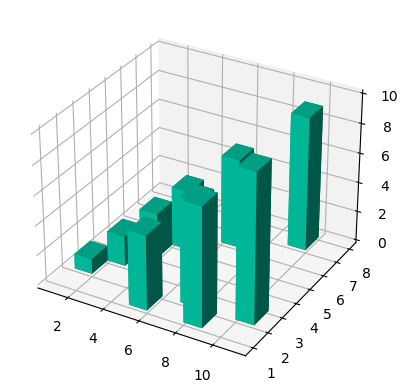

In [146]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ypos = [2, 3, 4, 5, 1, 6, 2, 1, 7, 2]
num_elements = len(xpos)
zpos = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Change background color to white and make it slightly transparent
ax1.xaxis.pane.fill = False  # Disable default filling
ax1.xaxis.pane.set_edgecolor('w')  # White edge color
ax1.xaxis.pane.set_alpha(0.9)  # Set transparency (0 to 1, where 0 is fully transparent)

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
plt.show()
